# Abstract

This notebook compares the candidate mechanism perturbation amplitude at multiple disease stages in Alzheimer's Disease experiments, using the PyBEL web service

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.tools.plotting import andrews_curves, parallel_coordinates
from sklearn.cluster import KMeans

In [ ]:
%matplotlib inline

In [ ]:
np.random.seed(5)

In [4]:
early = 'http://pybel.scai.fraunhofer.de/api/analysis/3/download'
moderate = 'http://pybel.scai.fraunhofer.de/api/analysis/4/download'
severe = 'http://pybel.scai.fraunhofer.de/api/analysis/5/download'

In [53]:
early_df = pd.read_csv(early).rename(index=str, columns={"avg": "EarlyAvg"})
early_df.head()

,Namespace,Name,EarlyAvg,stddev,normality,median,neighbors,subgraph_size
0,GOBP,microglial cell activation involved in immune ...,0.000000,0.000000e+00,6.047757e-01,0.000000,4,5
1,GOBP,T cell activation,NaN,NaN,NaN,NaN,0,0
2,GOBP,apoptotic signaling pathway,NaN,NaN,NaN,NaN,0,1
3,GOBP,insulin receptor signaling pathway,NaN,NaN,NaN,NaN,0,1
4,MESHPP,Neurogenesis,0.226581,1.110223e-16,6.212907e-27,0.226581,1,4


In [54]:
moderate_df = pd.read_csv(moderate).rename(index=str, columns={"avg": "ModerateAvg"})
moderate_df.head()

,Namespace,Name,ModerateAvg,stddev,normality,median,neighbors,subgraph_size
0,GOBP,microglial cell activation involved in immune ...,0.000000,0.0,0.604776,0.000000,4,5
1,GOBP,T cell activation,NaN,NaN,NaN,NaN,0,0
2,GOBP,apoptotic signaling pathway,NaN,NaN,NaN,NaN,0,1
3,GOBP,insulin receptor signaling pathway,NaN,NaN,NaN,NaN,0,1
4,MESHPP,Neurogenesis,0.137767,0.0,0.604776,0.137767,1,4


In [55]:
severe_df = pd.read_csv(severe).rename(index=str, columns={"avg": "SevereAvg"})
severe_df.head()

,Namespace,Name,SevereAvg,stddev,normality,median,neighbors,subgraph_size
0,GOBP,microglial cell activation involved in immune ...,0.000000,0.000000e+00,6.047757e-01,0.000000,4,5
1,GOBP,T cell activation,NaN,NaN,NaN,NaN,0,0
2,GOBP,apoptotic signaling pathway,NaN,NaN,NaN,NaN,0,1
3,GOBP,insulin receptor signaling pathway,NaN,NaN,NaN,NaN,0,1
4,MESHPP,Neurogenesis,-0.186822,2.775558e-17,6.212907e-27,-0.186822,1,4


Concatenate the average scores into a single data frame

In [57]:
df = pd.concat([
    early_df[['Namespace', 'Name','EarlyAvg']], 
    moderate_df['ModerateAvg'], 
    severe_df['SevereAvg']
], axis=1)

df = df[df['EarlyAvg'].notnull()]
df = df[df['EarlyAvg'] != 0]

cols = ['EarlyAvg', 'ModerateAvg', 'SevereAvg']

df.head()

,Namespace,Name,EarlyAvg,ModerateAvg,SevereAvg
4,MESHPP,Neurogenesis,0.226581,0.137767,-0.186822
7,PMIBP,ST6GAL1 secretion,-0.085421,0.066005,-0.001897
22,GOBP,regulation of neuronal synaptic plasticity,-0.082593,-1.023411,-0.390744
25,ADO,loss_of_synapses,0.041853,-0.022752,-0.033649
42,PMIBP,spatial memory,-0.041853,0.022752,0.033649


Use the pearson correlation over the time series

In [58]:
corr_df = df[cols].T.corr()

Clustering reveals 3 general patterns of biological processes throughout the progressions.

/usr/local/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


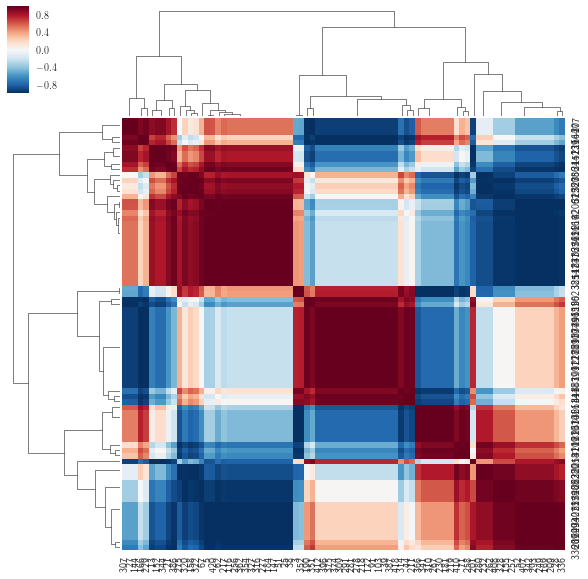

In [43]:
sns.clustermap(corr_df)
plt.show()

Assign classes based on a simple k-means clustering.

In [59]:
km = KMeans(n_clusters=3)
km.fit(df[cols])

df['label'] = km.labels_

Parallel coordinates immediately reveal the groups of patterns in relation of each mechanism to the disease progressions.

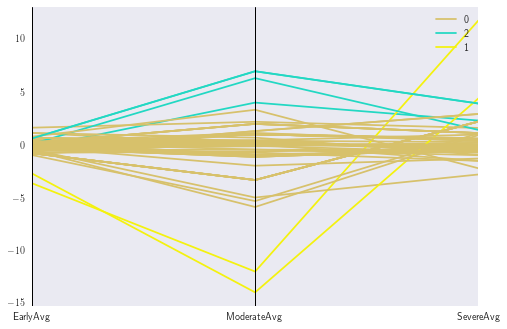

In [62]:
parallel_coordinates(df[cols + ['label']], 'label')
plt.show()

Andrews curves provide an alternative visualization.

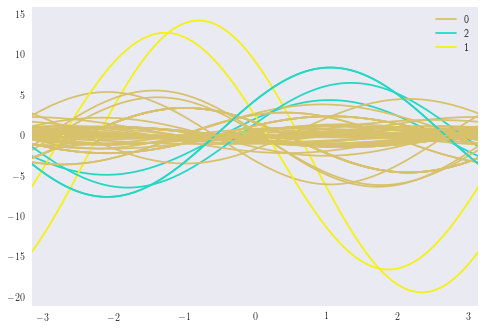

In [60]:
andrews_curves(df[cols + ['label']], 'label')
plt.show()

# Conclusions

Patients can be measured at multiple time points to be temporally aligned based on these patterns and possibly identify a disease subtype.